<a href="https://colab.research.google.com/github/Kiran771/AI_churn_prediction/blob/main/AI_Churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate
from sklearn.metrics import confusion_matrix,make_scorer,  average_precision_score, ConfusionMatrixDisplay,classification_report, f1_score, precision_score, recall_score,roc_curve, auc,roc_auc_score,precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import LogisticRegression

## **Load dataset**

In [ ]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **Data Profiling**

In [ ]:
df.shape

(10000, 14)

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


([<matplotlib.patches.Wedge at 0x79ebab4be3c0>,
 [Text(-0.6568643701797422, -0.8823430167391653, '0'),
  Text(0.6568640826758595, 0.8823432307726976, '1')],
 [Text(-0.3582896564616775, -0.4812780091304537, '79.6%'),
  Text(0.3582894996413779, 0.4812781258760168, '20.4%')])

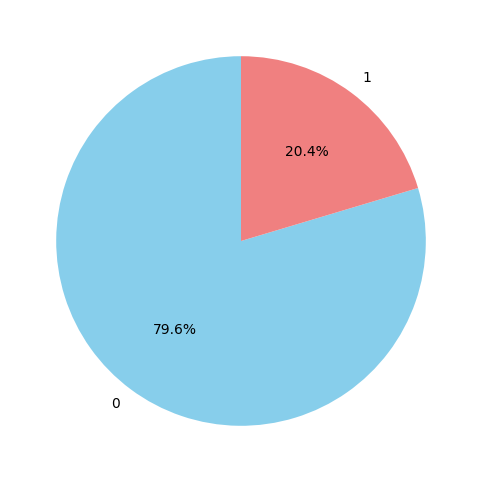

In [ ]:
## Plot class distribution
counts=df['Exited'].value_counts()
labels = counts.index
colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
# Separating Feature and target
x = df.drop('Exited', axis=1)
y = df['Exited']


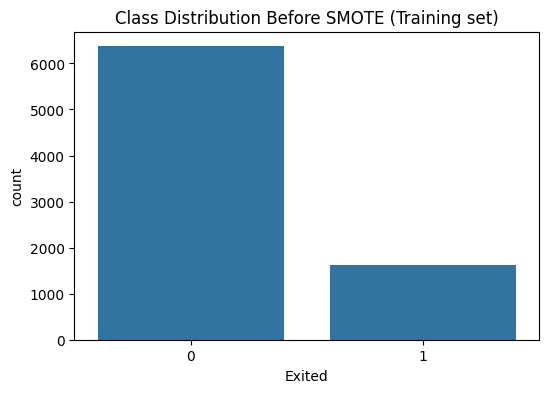

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Class Distribution Before SMOTE (Training set)")
plt.show()

In [ ]:
# split train and test
x_train,x_test, y_train, y_test = train_test_split(
     x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# separating numeric and categorical features
categorical_cols = ['Geography', 'Gender']

init_numeric_cols = x_train.columns.difference(categorical_cols)
cols_to_exclude = ['HasCrCard', 'IsActiveMember']
numeric_cols = init_numeric_cols.difference(cols_to_exclude)

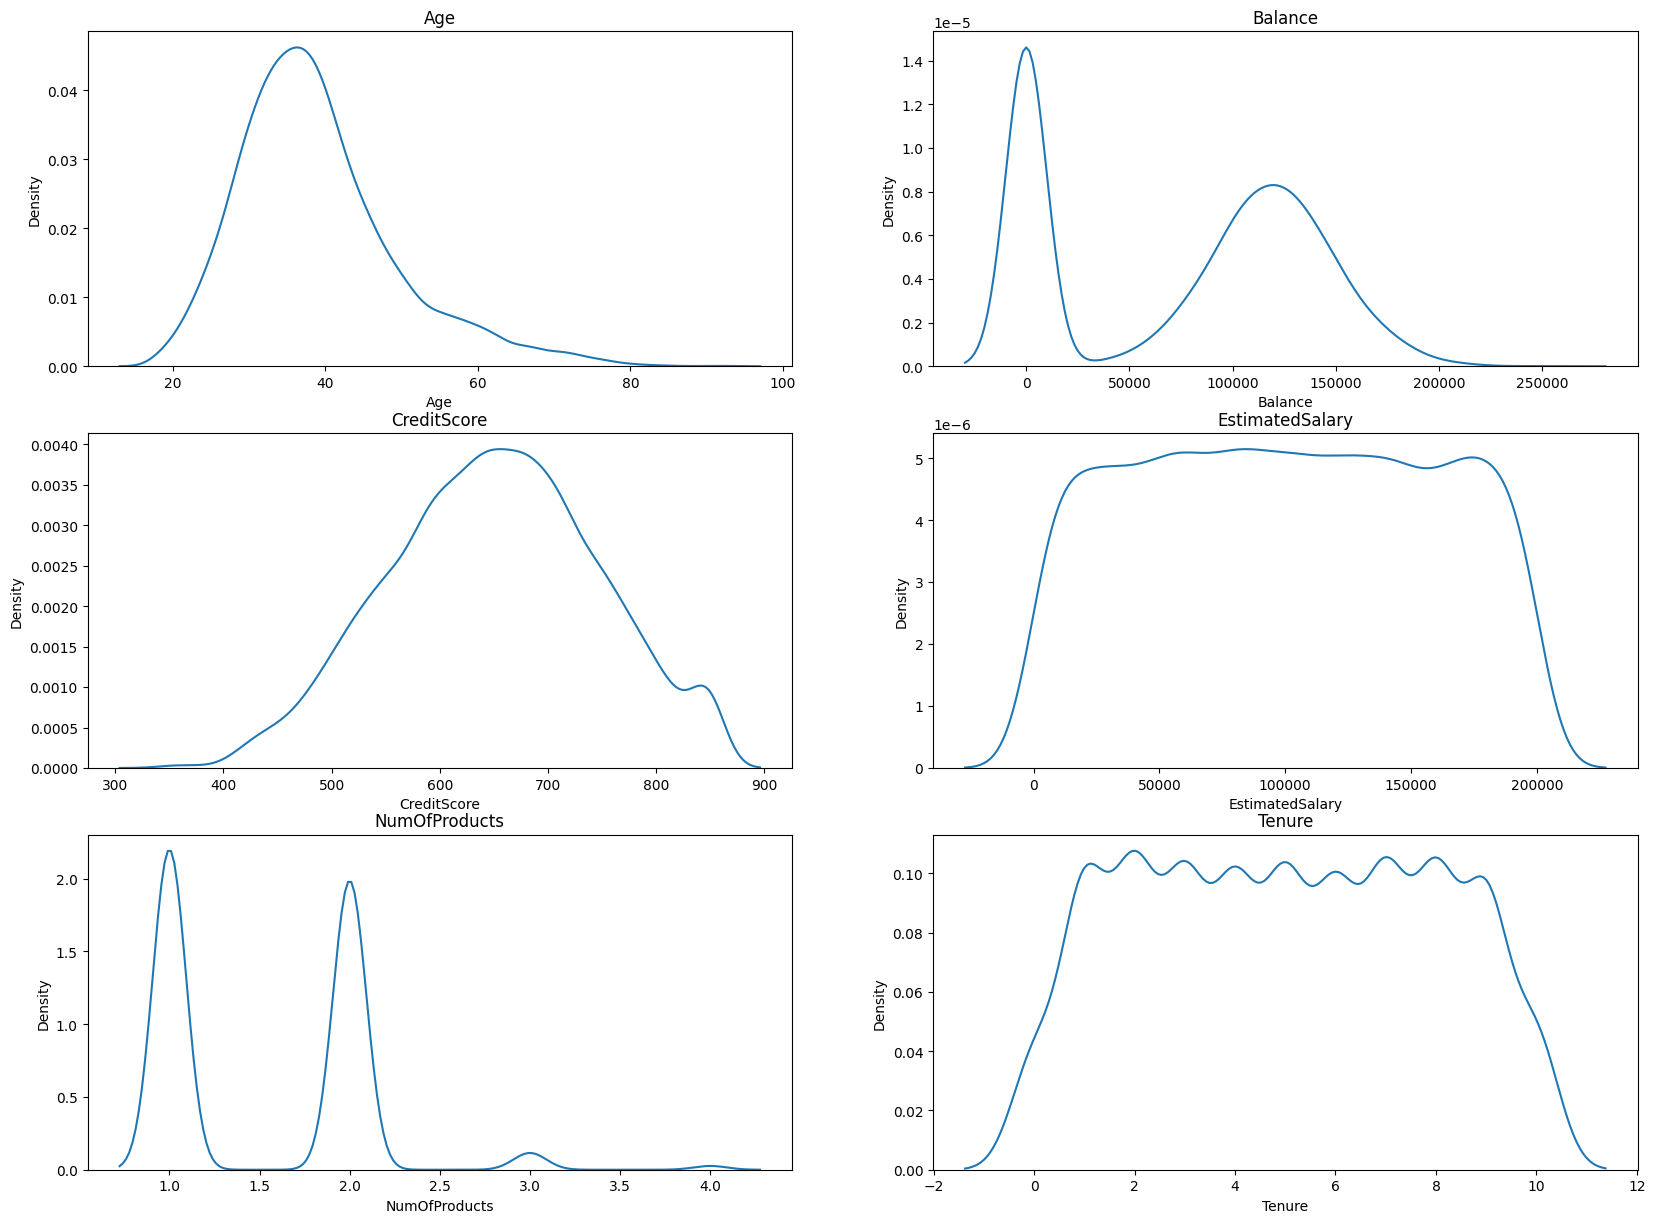

In [ ]:
# kde plot
plt.figure(figsize=(20,20))
for i in range(len(numeric_cols)):
  plt.subplot(4,2,i+1)
  sns.kdeplot(df[f'{numeric_cols[i]}'])
  plt.title(numeric_cols[i])

## Data Transformation and Encoding

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)

# **Logistic Regression**

In [ ]:
# Apply preprocessing transformations and feature encoding
x_train_p = preprocessor.fit_transform(x_train)
x_test_p=preprocessor.transform(x_test)

In [ ]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(x_train_p, y_train)

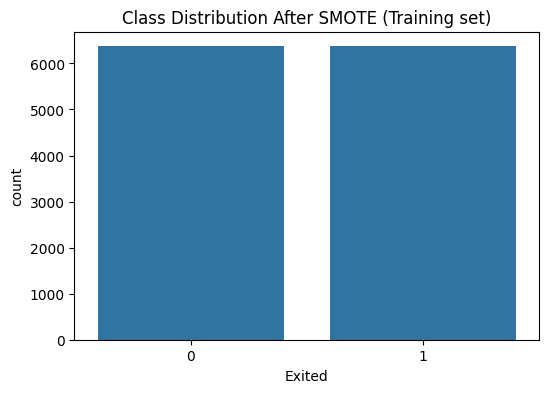

In [ ]:
# Distribution of minority class after applyying SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title("Class Distribution After SMOTE (Training set)")
plt.show()

In [ ]:
pipeline_lr = Pipeline([
    ('smote', smote),
    ('lr', LogisticRegression(
        solver='lbfgs',
        penalty='l2',
        max_iter=2000,
        random_state=42
    ))
])

In [ ]:
pipeline_lr.fit(x_train_p,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('lr', LogisticRegression(max_iter=2000, random_state=42))])

In [ ]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score, pos_label=1)

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, pos_label=1),
    'recall': make_scorer(recall_score, pos_label=1),
    'f1': make_scorer(f1_score, pos_label=1)
}

In [ ]:
cv_results = cross_validate(
    pipeline_lr,
    x_train_p,
    y_train,
    cv=kf,
    scoring=scoring
)


# Cross validation result - 5folds

In [ ]:
for metric in scoring.keys():
    print(f"{metric} per fold: {cv_results['test_' + metric]}")
    print(f"{metric} mean: {cv_results['test_' + metric].mean():.3f}\n")

accuracy per fold: [0.7175   0.713125 0.735625 0.689375 0.71625 ]
accuracy mean: 0.714

precision per fold: [0.390625   0.38971808 0.41535777 0.34920635 0.37969925]
precision mean: 0.385

recall per fold: [0.69018405 0.7208589  0.73006135 0.60736196 0.6196319 ]
recall mean: 0.674

f1 per fold: [0.49889135 0.50592034 0.5294772  0.44344905 0.47086247]
f1 mean: 0.490



 # Prediction on test set - Logistic Regression

In [ ]:
y_test_pred = pipeline_lr.predict(x_test_p)
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.71      0.79      1593
           1       0.38      0.68      0.49       407

    accuracy                           0.71      2000
   macro avg       0.64      0.70      0.64      2000
weighted avg       0.79      0.71      0.73      2000



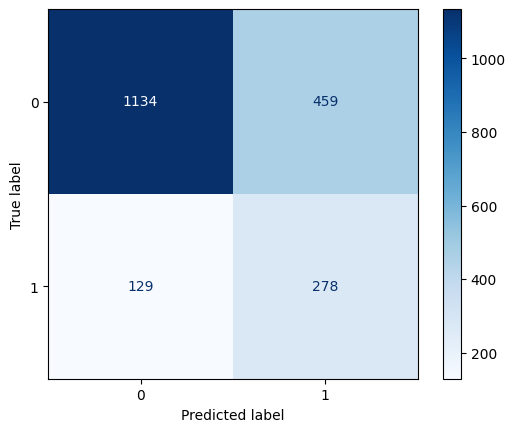

In [ ]:
cm_lr = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=[0,1])
disp.plot(cmap='Blues')

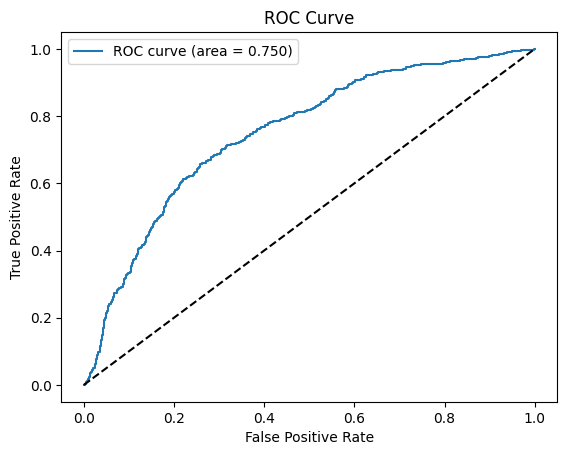

In [ ]:
y_prob_lr=pipeline_lr.predict_proba(x_test_p)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = roc_auc_score(y_test, y_prob_lr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.3f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_lr)
avg_precision = average_precision_score(y_test, y_prob_lr)

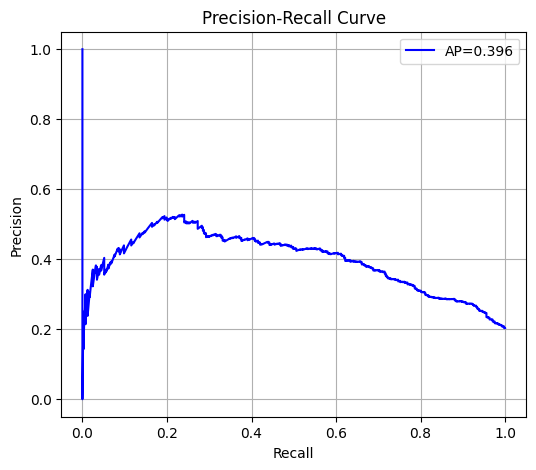

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='b', label=f'AP={avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()


# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    oob_score=True,
    warm_start=True,
    random_state=42
)


In [ ]:
pipeline_rf = Pipeline([
    ('smote', smote),
    ('classifier', rf_model)
])

In [ ]:
pipeline_rf.fit(x_train_p,y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 RandomForestClassifier(max_depth=6, n_estimators=200,
                                        oob_score=True, random_state=42,
                                        warm_start=True))])

In [ ]:
y_test_pred_rf=pipeline_rf.predict(x_test_p)

In [ ]:
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.73      0.58       407

    accuracy                           0.78      2000
   macro avg       0.70      0.76      0.71      2000
weighted avg       0.83      0.78      0.80      2000



In [ ]:
cv_results = cross_validate(
    pipeline_rf,
    x_train_p,
    y_train,
    cv=kf,
    scoring=scoring
)

In [ ]:
for metric in scoring.keys():
    print(f"{metric} per fold: {cv_results['test_' + metric]}")
    print(f"{metric} mean: {cv_results['test_' + metric].mean():.3f}\n")

accuracy per fold: [0.7875   0.78875  0.8025   0.781875 0.784375]
accuracy mean: 0.789

precision per fold: [0.48582996 0.488      0.51072961 0.47472527 0.47974414]
precision mean: 0.488

recall per fold: [0.73619632 0.74846626 0.73006135 0.66257669 0.69018405]
recall mean: 0.713

f1 per fold: [0.58536585 0.59079903 0.6010101  0.553137   0.56603774]
f1 mean: 0.579



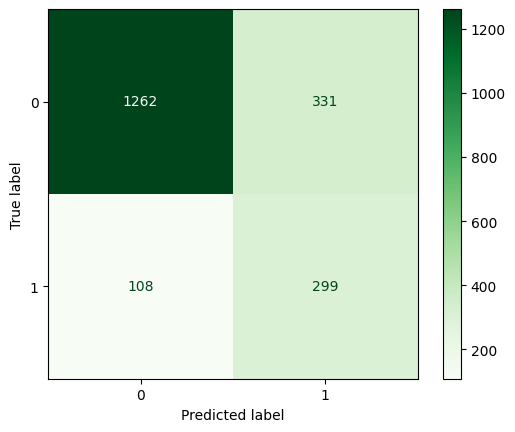

In [ ]:
cm_rf = confusion_matrix(y_test, y_test_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[0,1])
disp_rf.plot(cmap='Greens')


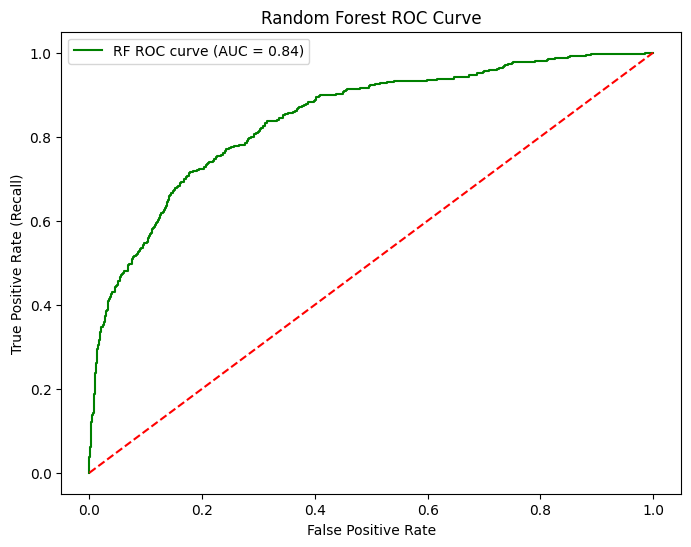

In [ ]:
y_prob_rf=pipeline_rf.predict_proba(x_test_p)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='green', label=f'RF ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Random Forest ROC Curve')
plt.legend()
plt.show()

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_rf)
avg_precision = average_precision_score(y_test, y_prob_rf)

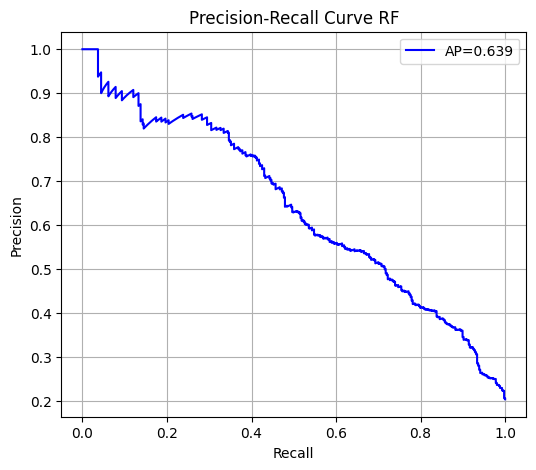

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='b', label=f'AP={avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve RF')
plt.legend()
plt.grid(True)
plt.show()

# **Neural Network**

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow.keras.backend as K
import random


In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_p, y_train,
    test_size=0.2,
    random_state=42,
    stratify=y_train
)

In [ ]:
random.seed(42)

# Set NumPy random seed
np.random.seed(42)

# Set TensorFlow random seed
tf.random.set_seed(42)


In [ ]:
# Define Focal Loss function
def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1.0 - epsilon)

        # Calculate focal loss
        pt = tf.where(tf.equal(y_true, 1), y_pred, 1 - y_pred)
        focal_weight = K.pow(1. - pt, gamma)

        # Binary cross entropy
        bce = -y_true * K.log(y_pred) - (1 - y_true) * K.log(1 - y_pred)

        # Apply focal weight and alpha
        focal = alpha * focal_weight * bce

        return K.mean(focal)
    return focal_loss_fixed

In [ ]:
model = Sequential([
    Input(shape=(x_train_p.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1),
    Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.1
            ),
    Dense(1, activation='sigmoid')
])

In [ ]:
# compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=focal_loss(gamma=2.7, alpha=0.75
                    ),
    metrics=['accuracy']
)

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)



In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=62,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7218 - loss: 0.1906 - val_accuracy: 0.8125 - val_loss: 0.1194
Epoch 2/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8147 - loss: 0.1093 - val_accuracy: 0.8256 - val_loss: 0.0812
Epoch 3/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8277 - loss: 0.0778 - val_accuracy: 0.8400 - val_loss: 0.0656
Epoch 4/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8290 - loss: 0.0651 - val_accuracy: 0.8325 - val_loss: 0.0587
Epoch 5/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8314 - loss: 0.0587 - val_accuracy: 0.8431 - val_loss: 0.0549
Epoch 6/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8341 - loss: 0.0554 - val_accuracy: 0.8450 - val_loss: 0.0529
Epoch 7/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8327 - loss: 0.0535 - val_accuracy: 0.8462 - val_loss: 0.0515
Epoch 8/50
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8352 - loss: 0.0523 - val_accurac

In [ ]:
y_pred_prob = model.predict(x_test_p)
# threshold=0.45
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)




63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [ ]:
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.71      0.44      0.54       407

    accuracy                           0.85      2000
   macro avg       0.79      0.70      0.73      2000
weighted avg       0.84      0.85      0.84      2000



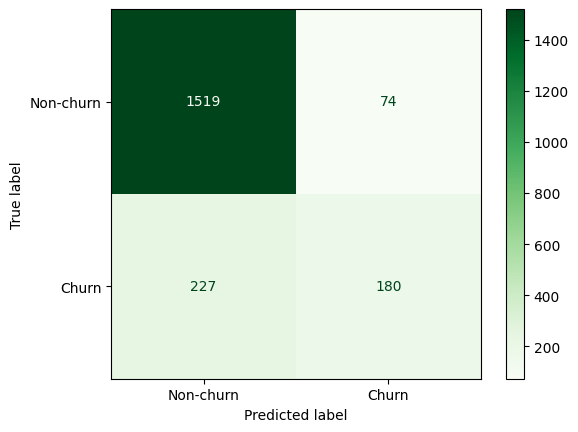

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['Non-churn','Churn'])
disp_rf.plot(cmap='Greens')


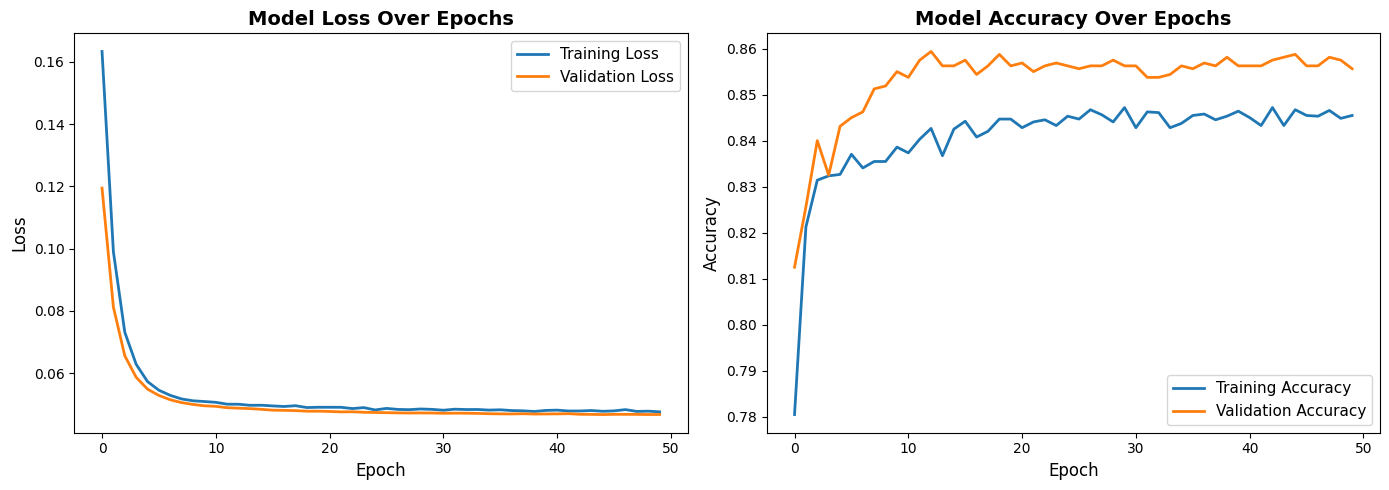

In [ ]:
# Plot Training and Validation Loss
plt.figure(figsize=(14, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.title('Model Loss Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=11)


# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.title('Model Accuracy Over Epochs', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=11)


plt.tight_layout()
plt.show()


# ROC curve of NN


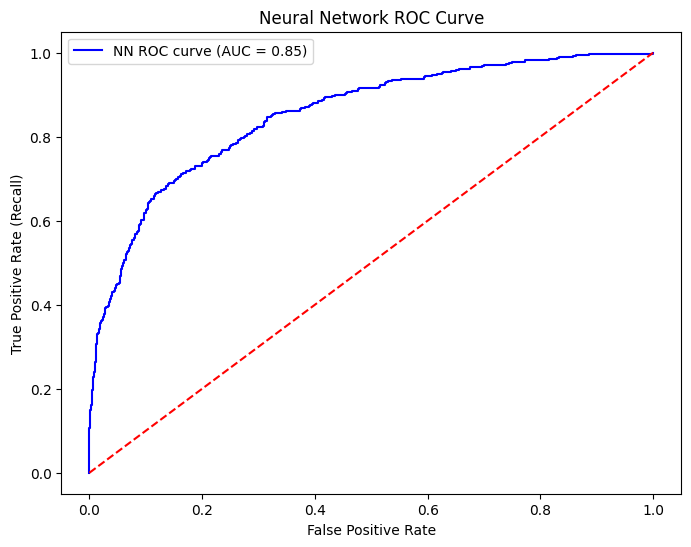

In [ ]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(8,6))
plt.plot(fpr_nn, tpr_nn, color='blue', label=f'NN ROC curve (AUC = {roc_auc_nn:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Neural Network ROC Curve')
plt.legend()
plt.show()

# Precision curve of Neuranl Network


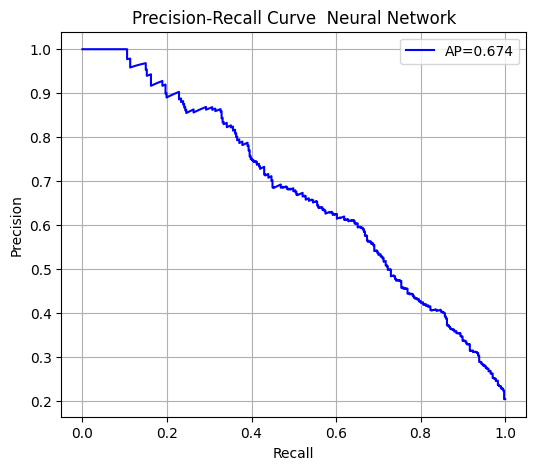

In [ ]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test,y_pred_prob)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, color='b', label=f'AP={avg_precision:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve  Neural Network')
plt.legend()
plt.grid(True)
plt.show()